# Importing The Necessery Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Books Data Preprocessing

In [2]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('ratings.csv')
users = pd.read_csv('users.csv')

In [3]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1048575, 3)
(278858, 3)


In [6]:
print(books.ISBN.nunique())
print(ratings.ISBN.nunique())

271360
322473


In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# EDA (Exploratory Data Analysis)

In [8]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
books['Year-Of-Publication'].value_counts()

2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924        1
2012        1
1927        1
1931        1
2037        1
Name: Year-Of-Publication, Length: 202, dtype: int64

In [10]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [11]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [12]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [13]:
books[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [14]:
books.loc[books.ISBN=='078946697X','Year-Of-Publication']=2000
books.loc[books.ISBN=='078946697X','Book-Author']='Michael Teitelbaum'
books.loc[books.ISBN=='078946697X','Publisher']='DK Publishing Inc'


In [15]:
books.loc[books.ISBN=='0789466953','Year-Of-Publication']=2000
books.loc[books.ISBN=='0789466953','Publisher']='DK Publishing Inc'
books.loc[books.ISBN=='0789466953','Book-Author']='James Buckley'

In [16]:
books[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [17]:

books.loc[books.ISBN=='2070426769','Year-Of-Publication']=2003
books.loc[books.ISBN=='2070426769','Publisher']='Gallimard'
books.loc[books.ISBN=='=2070426769','Book-Author']='Jean-Marie Gustave Le '

In [18]:
#checking the null values

In [19]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [20]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'],errors='coerce')

In [21]:
print (books['Year-Of-Publication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984
    0 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973
 1972 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950
 1967 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947
 1945 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927
 1931 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917
 1901 2010 1908 1906 1935 1806 2021 2012 2006 1909 2008 1378 1919 1922
 1897 2024 1376 2037]


In [22]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [23]:
books.loc[books['Year-Of-Publication']==0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


In [24]:
books.loc[books['Year-Of-Publication']==0,'Year-Of-Publication']=np.nan

In [25]:
books['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 2030., 1911., 1904., 1949., 1932.,
       1928., 1929., 1927., 1931., 1914., 2050., 1934., 1910., 1933.,
       1902., 1924., 1921., 1900., 2038., 2026., 1944., 1917., 1901.,
       2010., 1908., 1906., 1935., 1806., 2021., 2012., 2006., 1909.,
       2008., 1378., 1919., 1922., 1897., 2024., 1376., 2037.])

In [26]:
books.loc[(books['Year-Of-Publication']>2022) | (books['Year-Of-Publication']==0),'Year-Of-Publication']=np.nan

In [27]:
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()),inplace=True)

In [28]:
books['Year-Of-Publication'].astype('int')

0         2002
1         2001
2         1991
3         1999
4         1999
          ... 
271355    1988
271356    1991
271357    2004
271358    1996
271359    2000
Name: Year-Of-Publication, Length: 271360, dtype: int32

In [29]:
books.loc[books.Publisher.isna(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [30]:
books.loc[books.ISBN=='193169656X','Publisher']='other'

books.loc[books.ISBN=='1931696993','Publisher']='other'

In [31]:
books.loc[books['Book-Author'].isna(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [32]:
books.loc[books.ISBN=='9627982032','Book-Author']='David Tait'

In [33]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [34]:
books.loc[books['Image-URL-L'].isna(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000.0,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,2003.0,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000.0,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [35]:
books.loc[books.ISBN=='0789466953','Image-URL-L']='https://m.media-amazon.com/images/I/51ZGVGH05SL._SY344_BO1,204,203,200_.jpg'
books.loc[books.ISBN=='078946697X','Image-URL-L']='https://m.media-amazon.com/images/I/51BM2BYJ1JL._SY344_BO1,204,203,200_.jpg'
books.loc[books.ISBN=='2070426769','Image-URL-L']='https://ec56229aec51f1baff1d-185c3068e22352c56024573e929788ff.ssl.cf1.rackcdn.com/attachments/large/7/0/1/002729701.jpg'


In [36]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [37]:
# Rename the columns of the DataFrame
books.rename(columns={"Year-Of-Publication":'Year', 'Book-Title' : 'Title', 'Book-Author' : 'Author'}, inplace=True)

In [38]:
books.head(1)

,ISBN,Title,Author,Year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


# Users Data Preprocessing

In [39]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['User-ID', 'Location', 'Age']


In [40]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [41]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [42]:
users['User-ID'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [43]:
users=users.rename(columns={"User-ID":"User_ID"})
users.head(2)

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [44]:
users_df = users[pd.notnull(users['Location'])]
users_df

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [45]:
users_df[['City', 'State', 'Country']] = users_df['Location'].str.split(', ', expand=True, n=2)
users_df[['City', 'State', 'Country']] = users_df[['City', 'State', 'Country']].fillna("Not specified")

In [46]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278858 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
 3   City      278858 non-null  object 
 4   State     278858 non-null  object 
 5   Country   278858 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 14.9+ MB


In [47]:
users_df.isna().sum()

User_ID          0
Location         0
Age         110762
City             0
State            0
Country          0
dtype: int64

<AxesSubplot:xlabel='Age'>

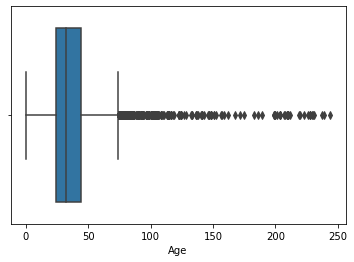

In [48]:
sns.boxplot(users_df['Age'],orient='h')

<AxesSubplot:>

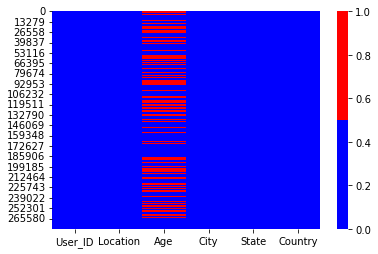

In [49]:
sns.heatmap(users_df.isna(),cmap=['b','r'])

In [50]:
null_val = users_df.isna().sum()/len(users)*100
null_val

User_ID      0.000000
Location     0.000000
Age         39.719857
City         0.000000
State        0.000000
Country      0.000000
dtype: float64

In [51]:
#as per the rules null values between 4 to 40% need to fill those by calculating the mean


In [52]:
users_df["Age"]= users_df["Age"].fillna( users_df["Age"].mean())

In [53]:
users_df["Age"] = users_df["Age"].round(0)
users_df.head()

,User_ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",35.0,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",35.0,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",35.0,farnborough,hants,united kingdom


In [54]:
from textblob import TextBlob
import re

In [55]:
users_df.Location=users_df.Location.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))
users_df.Location=users_df.Location.apply(lambda x: x.title())
users_df

,User_ID,Location,Age,City,State,Country
0,1,Nyc New York Usa,35.0,nyc,new york,usa
1,2,Stockton California Usa,18.0,stockton,california,usa
2,3,Moscow Yukon Territory Russia,35.0,moscow,yukon territory,russia
3,4,Porto Vngaia Portugal,17.0,porto,v.n.gaia,portugal
4,5,Farnborough Hants United Kingdom,35.0,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,Portland Oregon Usa,35.0,portland,oregon,usa
278854,278855,Tacoma Washington United Kingdom,50.0,tacoma,washington,united kingdom
278855,278856,Brampton Ontario Canada,35.0,brampton,ontario,canada
278856,278857,Knoxville Tennessee Usa,35.0,knoxville,tennessee,usa


In [56]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278858 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
 3   City      278858 non-null  object 
 4   State     278858 non-null  object 
 5   Country   278858 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 14.9+ MB


In [57]:
users_df.shape

(278858, 6)

In [58]:
users_df.Age.astype('int64')

0         35
1         18
2         35
3         17
4         35
          ..
278853    35
278854    50
278855    35
278856    35
278857    35
Name: Age, Length: 278858, dtype: int64

# Ratings Data Preprocessing

In [59]:
print(ratings.shape)
print(list(ratings.columns))

(1048575, 3)
['User-ID', 'ISBN', 'Book-Rating']


In [60]:
ratings.rename(columns={'User-ID':'User_ID','Book-Rating':'rating'},inplace=True)

# Ratings Distributions

In [61]:
ratings.columns

Index(['User_ID', 'ISBN', 'rating'], dtype='object')

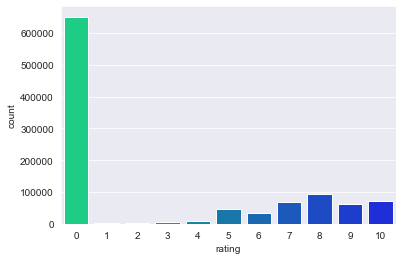

In [62]:
sns.set_style('darkgrid')
sns.countplot(ratings['rating'],palette='winter_r');

In [63]:
#most of the rating lies under 0

# Combine all data by merging all with related columns

In [64]:
ratings.columns

Index(['User_ID', 'ISBN', 'rating'], dtype='object')

In [65]:
final_df= ratings.merge(users_df, left_on="User_ID" , right_on="User_ID", how= "left")
final_df= final_df.merge(books, left_on="ISBN" , right_on="ISBN", how= "left")
final_df

,User_ID,ISBN,rating,Location,Age,City,State,Country,Title,Author,Year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Tyler Texas Usa,35.0,tyler,texas,usa,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,155061224,5,Seattle Washington Usa,35.0,seattle,washington,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,276727,446520802,0,H New South Wales Australia,16.0,h,new south wales,australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,276729,052165615X,3,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,521795028,6,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,250764,451410777,0,Cove Oregon Usa,35.0,cove,oregon,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,250764,452264464,8,Cove Oregon Usa,35.0,cove,oregon,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,250764,048623715X,0,Cove Oregon Usa,35.0,cove,oregon,usa,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982.0,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
1048573,250764,486256588,0,Cove Oregon Usa,35.0,cove,oregon,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
final_df

,User_ID,ISBN,rating,Location,Age,City,State,Country,Title,Author,Year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Tyler Texas Usa,35.0,tyler,texas,usa,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,155061224,5,Seattle Washington Usa,35.0,seattle,washington,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,276727,446520802,0,H New South Wales Australia,16.0,h,new south wales,australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,276729,052165615X,3,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,521795028,6,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,250764,451410777,0,Cove Oregon Usa,35.0,cove,oregon,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,250764,452264464,8,Cove Oregon Usa,35.0,cove,oregon,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,250764,048623715X,0,Cove Oregon Usa,35.0,cove,oregon,usa,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982.0,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
1048573,250764,486256588,0,Cove Oregon Usa,35.0,cove,oregon,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
final_df.columns

Index(['User_ID', 'ISBN', 'rating', 'Location', 'Age', 'City', 'State',
       'Country', 'Title', 'Author', 'Year', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [68]:
final_df.shape

(1048575, 15)

In [69]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User_ID      1048575 non-null  int64  
 1   ISBN         1048575 non-null  object 
 2   rating       1048575 non-null  int64  
 3   Location     1048575 non-null  object 
 4   Age          1048575 non-null  float64
 5   City         1048575 non-null  object 
 6   State        1048575 non-null  object 
 7   Country      1048575 non-null  object 
 8   Title        179091 non-null   object 
 9   Author       179091 non-null   object 
 10  Year         179091 non-null   float64
 11  Publisher    179091 non-null   object 
 12  Image-URL-S  179091 non-null   object 
 13  Image-URL-M  179091 non-null   object 
 14  Image-URL-L  179091 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 128.0+ MB


In [70]:
final_df.isna().sum()


User_ID             0
ISBN                0
rating              0
Location            0
Age                 0
City                0
State               0
Country             0
Title          869484
Author         869484
Year           869484
Publisher      869484
Image-URL-S    869484
Image-URL-M    869484
Image-URL-L    869484
dtype: int64

In [71]:
final_df.dropna(inplace=True)

In [72]:
final_df.duplicated().sum()

0

In [73]:
#Categorizing the age column by 'Children', 'Teenage', 'Young-adults', 'Middle-aged adults', 'Old-Aged adults', 'Very-Aged adults'

In [74]:
bin_edges = [0, 12, 20, 40, 60, 100,120]
bin_names = ['Children', 'Teenage', 'Young-adults', 'Middle-aged adults', 'Old-Aged adults', 'Very-Aged adults']
final_df['Age_category'] = pd.cut(final_df['Age'], bin_edges, labels=bin_names)

In [75]:
final_df.reset_index()

,index,User_ID,ISBN,rating,Location,Age,City,State,Country,Title,Author,Year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
0,0,276725,034545104X,0,Tyler Texas Usa,35.0,tyler,texas,usa,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Young-adults
1,3,276729,052165615X,3,Rijeka Na Croatia,16.0,rijeka,n/a,croatia,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,Teenage
2,5,276733,2080674722,0,Paris Na France,37.0,paris,n/a,france,Les Particules Elementaires,Michel Houellebecq,1998.0,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,Young-adults
3,8,276744,038550120X,7,Torrance California Usa,35.0,torrance,california,usa,A Painted House,JOHN GRISHAM,2001.0,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,Young-adults
4,13,276746,055356451X,0,Fort Worth,35.0,fort worth,",",Not specified,Night Sins,TAMI HOAG,1995.0,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,Young-adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179086,1048512,250764,044021808X,0,Cove Oregon Usa,35.0,cove,oregon,usa,The Magic Bullet,Harry Stein,1996.0,Island,http://images.amazon.com/images/P/044021808X.0...,http://images.amazon.com/images/P/044021808X.0...,http://images.amazon.com/images/P/044021808X.0...,Young-adults
179087,1048514,250764,044022179X,0,Cove Oregon Usa,35.0,cove,oregon,usa,Dirty White Boys,Stephen Hunter,1995.0,Island,http://images.amazon.com/images/P/044022179X.0...,http://images.amazon.com/images/P/044022179X.0...,http://images.amazon.com/images/P/044022179X.0...,Young-adults
179088,1048520,250764,044023509X,0,Cove Oregon Usa,35.0,cove,oregon,usa,Meltdown,James Powlik,2002.0,Dell Publishing Company,http://images.amazon.com/images/P/044023509X.0...,http://images.amazon.com/images/P/044023509X.0...,http://images.amazon.com/images/P/044023509X.0...,Young-adults
179089,1048522,250764,044023722X,0,Cove Oregon Usa,35.0,cove,oregon,usa,A Painted House,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,Young-adults


In [76]:
final_df.describe()

,User_ID,rating,Age,Year
count,179091.000000,179091.000000,179091.000000,179091.000000
mean,126432.574719,3.127901,35.926071,1996.715189
std,74248.772853,3.926865,11.884084,6.727362
min,8.000000,0.000000,0.000000,1376.000000
25%,61619.000000,0.000000,29.000000,1995.000000
50%,126814.000000,0.000000,35.000000,1998.000000
75%,189835.000000,7.000000,40.000000,2001.000000
max,278854.000000,10.000000,244.000000,2020.000000


In [77]:
new_df=final_df.iloc[:,[0,1,2,8,9]]
new_df.head()

,User_ID,ISBN,rating,Title,Author
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose
3,276729,052165615X,3,Help!: Level 1,Philip Prowse
5,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq
8,276744,038550120X,7,A Painted House,JOHN GRISHAM
13,276746,055356451X,0,Night Sins,TAMI HOAG


In [78]:
new_df.shape

(179091, 5)

In [79]:
new_df[new_df.duplicated()]

,User_ID,ISBN,rating,Title,Author


Divide the data in implicit and explicit

In [80]:
data_exp = final_df[final_df['rating']!=0]
# where ratings is more than 0

data_imp =final_df[final_df['rating']==0]
#where ratings = 0

In [81]:
users.columns

Index(['User_ID', 'Location', 'Age'], dtype='object')

In [82]:
# checking users who have gave 0 ratings
users_exp = users[users['User_ID'].isin(data_exp['User_ID'])]
#users who didn't gave 0 ratings

users_imp = users[users['User_ID'].isin(data_imp['User_ID'])]
#users who gave 0 ratings

In [83]:
print(data_exp.shape)
print(data_imp.shape)

(73770, 16)
(105321, 16)


In [84]:
data_exp.columns

Index(['User_ID', 'ISBN', 'rating', 'Location', 'Age', 'City', 'State',
       'Country', 'Title', 'Author', 'Year', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Age_category'],
      dtype='object')

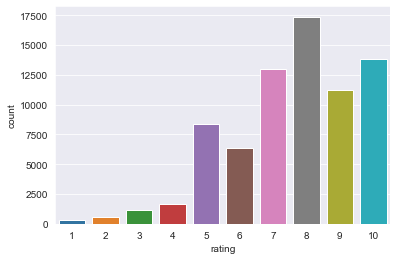

In [85]:
sns.countplot(data=data_exp,x='rating');

In [86]:
#the final dataset 
data_exp.shape

(73770, 16)

# Popularity Base Recommendation System

# Recommendation Based as per the Ratings


In [87]:
#Top 50 Popular Books

ratings_count = pd.DataFrame(data_exp.groupby(['ISBN'])['rating'].sum())
top50 = ratings_count.sort_values('rating',ascending=False).head(60)
print('Top 50 books recommended')
top50=top50.merge(books,left_index=True,right_on='ISBN')
top50

Top 50 books recommended


,rating,ISBN,Title,Author,Year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2143,2546,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
305,1884,044023722X,A Painted House,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...
1922,1810,067976402X,Snow Falling on Cedars,David Guterson,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...
5506,1704,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
456,1540,044021145X,The Firm,John Grisham,1992.0,Bantam Dell Publishing Group,http://images.amazon.com/images/P/044021145X.0...,http://images.amazon.com/images/P/044021145X.0...,http://images.amazon.com/images/P/044021145X.0...
1406,1306,1400034779,The No. 1 Ladies' Detective Agency (Today Show...,Alexander McCall Smith,2003.0,Anchor,http://images.amazon.com/images/P/1400034779.0...,http://images.amazon.com/images/P/1400034779.0...,http://images.amazon.com/images/P/1400034779.0...
3234,993,1558743669,"A Child Called \It\"": One Child's Courage to S...",Dave Pelzer,1995.0,Health Communications,http://images.amazon.com/images/P/1558743669.0...,http://images.amazon.com/images/P/1558743669.0...,http://images.amazon.com/images/P/1558743669.0...
4180,989,044651652X,The Bridges of Madison County,Robert James Waller,1992.0,Warner Books,http://images.amazon.com/images/P/044651652X.0...,http://images.amazon.com/images/P/044651652X.0...,http://images.amazon.com/images/P/044651652X.0...
1012,969,044022165X,The Rainmaker,JOHN GRISHAM,1996.0,Dell,http://images.amazon.com/images/P/044022165X.0...,http://images.amazon.com/images/P/044022165X.0...,http://images.amazon.com/images/P/044022165X.0...
5070,937,014028009X,Bridget Jones's Diary,Helen Fielding,1999.0,Penguin Books,http://images.amazon.com/images/P/014028009X.0...,http://images.amazon.com/images/P/014028009X.0...,http://images.amazon.com/images/P/014028009X.0...


In [88]:
data_exp.columns

Index(['User_ID', 'ISBN', 'rating', 'Location', 'Age', 'City', 'State',
       'Country', 'Title', 'Author', 'Year', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Age_category'],
      dtype='object')

In [89]:
#recommending top 20 books as per the number of ratings of book given by the users

num_rating= data_exp.groupby('Title').count()['rating'].reset_index()
num_rating.rename(columns={'rating':'num_rating'},inplace=True)
num_rating

,Title,num_rating
0,Earth Prayers From around the World: 365 Pray...,7
1,Final Fantasy Anthology: Official Strategy Gu...,2
2,Flight of Fancy: American Heiresses (Zebra Ba...,1
3,"Q-Zone (Star Trek The Next Generation, Book 48)",1
4,"Summonings: Books of Magic, Vol. 2",2
...,...,...
37537,Ã?Â?berleben in der WÃ?Â¼ste Danakil.,2
37538,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
37539,Ã?Â?rger mit Produkt X. Roman.,3
37540,Ã?Â?stlich der Berge.,1


In [90]:
data_exp.columns


Index(['User_ID', 'ISBN', 'rating', 'Location', 'Age', 'City', 'State',
       'Country', 'Title', 'Author', 'Year', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Age_category'],
      dtype='object')

In [91]:
#recommending top 20 books as per the average ratings of book given by the users.

avg_rating= data_exp.groupby('Title').mean()['rating'].reset_index()
avg_rating.rename(columns={'rating':'avg_rating'},inplace=True)
avg_rating

,Title,avg_rating
0,Earth Prayers From around the World: 365 Pray...,7.142857
1,Final Fantasy Anthology: Official Strategy Gu...,10.000000
2,Flight of Fancy: American Heiresses (Zebra Ba...,8.000000
3,"Q-Zone (Star Trek The Next Generation, Book 48)",6.000000
4,"Summonings: Books of Magic, Vol. 2",7.000000
...,...,...
37537,Ã?Â?berleben in der WÃ?Â¼ste Danakil.,6.500000
37538,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
37539,Ã?Â?rger mit Produkt X. Roman.,7.000000
37540,Ã?Â?stlich der Berge.,8.000000


In [92]:
total_rating = num_rating.merge(avg_rating,on='Title')
total_rating

,Title,num_rating,avg_rating
0,Earth Prayers From around the World: 365 Pray...,7,7.142857
1,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
2,Flight of Fancy: American Heiresses (Zebra Ba...,1,8.000000
3,"Q-Zone (Star Trek The Next Generation, Book 48)",1,6.000000
4,"Summonings: Books of Magic, Vol. 2",2,7.000000
...,...,...,...
37537,Ã?Â?berleben in der WÃ?Â¼ste Danakil.,2,6.500000
37538,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
37539,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
37540,Ã?Â?stlich der Berge.,1,8.000000


In [93]:
popular_df=total_rating[total_rating['num_rating']>=50].sort_values('avg_rating',ascending=False)

In [94]:
books.columns

Index(['ISBN', 'Title', 'Author', 'Year', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [95]:
popular_df=popular_df.merge(books,on='Title').drop_duplicates('Title')[['Title','Author','num_rating','avg_rating','Image-URL-M','Image-URL-L','Image-URL-S']]

In [96]:
#TOP popular 50 books recommended 
#Popularity based Model data

popular_df=popular_df.head(50)

In [97]:
popular_books = total_rating.merge(data_exp,on='Title').drop_duplicates(['User_ID','Title'])
popular_books.sort_values('num_rating',ascending=False)

,Title,num_rating,avg_rating,User_ID,ISBN,rating,Location,Age,City,State,Country,Author,Year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age_category
1460,A Painted House,331,7.332326,277212,044023722X,8,Framingham Massachusetts Usa,35.0,framingham,massachusetts,usa,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,Young-adults
1687,A Painted House,331,7.332326,172539,044023722X,7,Lakewood California Usa,35.0,lakewood,california,usa,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,Young-adults
1685,A Painted House,331,7.332326,172098,044023722X,6,Grove City Ohio Usa,42.0,grove city,ohio,usa,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,Middle-aged adults
1684,A Painted House,331,7.332326,171130,044023722X,10,Bloomington Indiana Usa,35.0,bloomington,indiana,usa,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,Young-adults
1683,A Painted House,331,7.332326,170861,044023722X,5,Hopkinton Massachusetts Usa,44.0,hopkinton,massachusetts,usa,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,Middle-aged adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37008,Le dÃ©sir d'Ãªtre inutile: Souvenirs et rÃ©fle...,1,10.000000,199841,2221066456,10,So Paulo So Paulo Brazil,38.0,são paulo,são paulo,brazil,Hugo Pratt,1991.0,R. Laffont,http://images.amazon.com/images/P/2221066456.0...,http://images.amazon.com/images/P/2221066456.0...,http://images.amazon.com/images/P/2221066456.0...,Young-adults
37009,Le dÃ©sir d'Ãªtre un volcan: Journal hÃ©doniste,1,9.000000,8890,224648751X,9,Paris Iledefrance France,47.0,paris,ile-de-france,france,Michel Onfray,1996.0,Grasset,http://images.amazon.com/images/P/224648751X.0...,http://images.amazon.com/images/P/224648751X.0...,http://images.amazon.com/images/P/224648751X.0...,Middle-aged adults
37010,Le dÃ©sir du cannibale: Roman,1,9.000000,33145,2221082621,9,Saintdizier Champagneardenne France,30.0,saint-dizier,champagne-ardenne,france,Jean-Paul Tapie,1996.0,R. Laffont,http://images.amazon.com/images/P/2221082621.0...,http://images.amazon.com/images/P/2221082621.0...,http://images.amazon.com/images/P/2221082621.0...,Young-adults
37011,Le esopine: Storie di animali (Ultimo Novecento),1,9.000000,23939,8874975554,9,Padova Veneto Italy,33.0,padova,veneto,italy,Maria Suglia Pesce,1994.0,M. Solfanelli,http://images.amazon.com/images/P/8874975554.0...,http://images.amazon.com/images/P/8874975554.0...,http://images.amazon.com/images/P/8874975554.0...,Young-adults


In [98]:
#Considering only the books who has been rated more than 50 users for analysis

final_data=popular_books[popular_books['num_rating']>=20]

In [99]:
final_data.shape

(10572, 18)

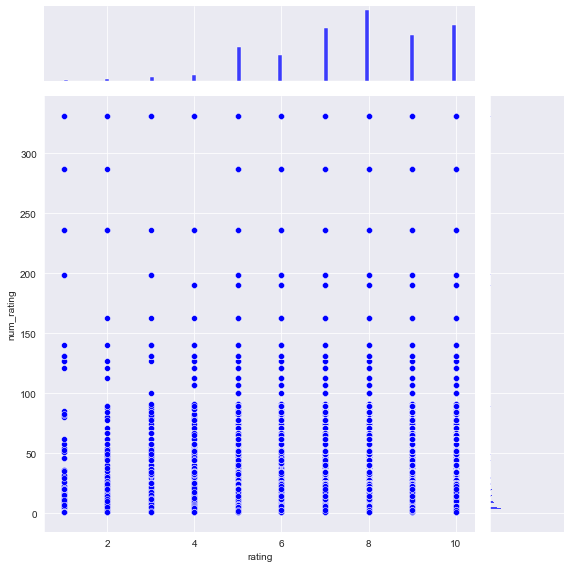

In [100]:
## Visualize the distribution of ratings
sns.jointplot(data=popular_books,x='rating',y='num_rating',height=8,color ='b')


# Recommendation as per the country 

In [101]:
popular_books_region =final_data['Country'].value_counts()
popular_books_region

usa               7696
canada             917
Not specified      353
germany            349
united kingdom     279
                  ... 
greece"              1
luxembourg           1
hungary              1
texas, usa           1
thailand             1
Name: Country, Length: 81, dtype: int64

In [102]:
#Popular books from USA

popular_books_usa = final_data[final_data['Country']=='usa']
popular_books_usa

#Top 20 books from USA
Top_books_usa =popular_books_usa.groupby('Title')['rating'].count().reset_index()
Top_books_usa=Top_books_usa.sort_values('rating',ascending=False).head(20)
Top_books_usa.rename(columns={'rating':'num_rating'},inplace=True)
Top_books_usa

,Title,num_rating
4,A Painted House,280
96,Harry Potter and the Sorcerer's Stone (Harry P...,244
145,Snow Falling on Cedars,174
94,Harry Potter and the Order of the Phoenix (Boo...,153
173,The Firm,151
190,The No. 1 Ladies' Detective Agency (Today Show...,122
159,The Bridges of Madison County,102
2,"A Child Called \It\"": One Child's Courage to S...",101
198,The Rainmaker,99
33,Bridget Jones's Diary,96


In [103]:
#Popular books from canada
popular_books_canada = final_data[final_data['Country']=='canada']
popular_books_canada

#Top 20 books
Top_books_canada =popular_books_canada.groupby('Title')['rating'].count().reset_index()
Top_books_canada=Top_books_canada.sort_values('rating',ascending=False).head(20)
Top_books_canada.rename(columns={'rating':'num_rating'},inplace=True)
Top_books_canada

,Title,num_rating
123,Snow Falling on Cedars,32
147,The Firm,24
86,How to Be Good,22
153,The Hundred Secret Senses,20
170,The Rainmaker,19
58,Dreamcatcher,17
156,The Kitchen God's Wife,16
83,High Fidelity,16
4,A Painted House,16
160,The Lost World,15


# Recommendation based as per the AGE groups

In [104]:
final_data['Age_category'].unique()

['Middle-aged adults', 'Teenage', 'Young-adults', 'Old-Aged adults', 'Very-Aged adults', NaN, 'Children']
Categories (6, object): ['Children' < 'Teenage' < 'Young-adults' < 'Middle-aged adults' < 'Old-Aged adults' < 'Very-Aged adults']

In [105]:
#Popular books for Childrens
popular_books_children = final_data[final_data['Age_category']=='Children']
popular_books_children

#Top 20 books for childrens
Top_books_children =popular_books_children.groupby('Title')['rating'].count().reset_index()
Top_books_children=Top_books_children.sort_values('rating',ascending=False).head(20)
Top_books_children.rename(columns={'rating':'num_rating'},inplace=True)
Top_books_children

,Title,num_rating
4,Harry Potter and the Sorcerer's Stone (Harry P...,6
2,Flesh Tones: A Novel,2
10,Tales of a Fourth Grade Nothing,2
11,The Cat in the Hat,2
0,Charlotte's Web,1
1,Cold Sassy Tree,1
3,Harry Potter and the Order of the Phoenix (Boo...,1
5,Hornet's Nest,1
6,My Sergei: A Love Story,1
7,Schlafes Bruder,1


In [106]:
#Popular books for Teenagers
popular_books_Teenage = final_data[final_data['Age_category']=='Teenage']
popular_books_Teenage

#Top 20 books for Teenagers
Top_books_Teenage =popular_books_Teenage.groupby('Title')['rating'].count().reset_index()
Top_books_Teenage=Top_books_Teenage.sort_values('rating',ascending=False).head(20)
Top_books_Teenage.rename(columns={'rating':'num_rating'},inplace=True)
Top_books_Teenage

,Title,num_rating
58,Harry Potter and the Sorcerer's Stone (Harry P...,29
30,Chicken Soup for the Teenage Soul (Chicken Sou...,23
56,Harry Potter and the Order of the Phoenix (Boo...,22
124,The Outsiders (Now in Speak!),18
97,Speak,16
31,Chicken Soup for the Teenage Soul II (Chicken ...,11
1,"A Child Called \It\"": One Child's Courage to S...",11
15,Bag of Bones,9
121,The Lost World,8
95,Snow Falling on Cedars,7


In [107]:
#Popular books for Middle-aged adults

popular_books_Middle_aged_adults = final_data[final_data['Age_category']=='Middle-aged adults']
popular_books_Middle_aged_adults

#Top 20 books for Middle-aged adults

Top_books_Middle_aged_adults =popular_books_Middle_aged_adults.groupby('Title')['rating'].count().reset_index()
Top_books_Middle_aged_adults=Top_books_Middle_aged_adults.sort_values('rating',ascending=False).head(20)
Top_books_Middle_aged_adults.rename(columns={'rating':'num_rating'},inplace=True)
Top_books_Middle_aged_adults

,Title,num_rating
4,A Painted House,78
202,The No. 1 Ladies' Detective Agency (Today Show...,51
155,Snow Falling on Cedars,40
100,Harry Potter and the Sorcerer's Stone (Harry P...,36
165,Tears of the Giraffe (No.1 Ladies Detective Ag...,30
185,The Firm,27
146,STONES FROM THE RIVER,27
98,Harry Potter and the Order of the Phoenix (Boo...,27
171,The Bridges of Madison County,26
206,The Perfect Storm : A True Story of Men Agains...,23


In [108]:
final_data.shape

(10572, 18)

In [109]:
book_pivot=final_data.pivot_table(index='Title',columns='User_ID',values='rating')

book_pivot 

User_ID,75,243,244,256,334,388,446,496,503,505,...,278390,278418,278534,278541,278582,278633,278832,278843,278851,278854
Title,,,,,,,,,,,,,,,,,,,,,
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A 4th Course of Chicken Soup for the Soul: 101 More Stories to Open the Heart and Rekindle the Spirit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"A Child Called \It\"": One Child's Courage to Survive""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Fine Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Painted House,NaN,7.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
What to Expect When You're Expecting (Revised Edition),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Whispers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Wolves of the Calla (The Dark Tower, Book 5)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
book_pivot.shape

(244, 6890)

In [111]:
book_pivot.fillna(0,inplace=True)

In [112]:
book_pivot

User_ID,75,243,244,256,334,388,446,496,503,505,...,278390,278418,278534,278541,278582,278633,278832,278843,278851,278854
Title,,,,,,,,,,,,,,,,,,,,,
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A 4th Course of Chicken Soup for the Soul: 101 More Stories to Open the Heart and Rekindle the Spirit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Fine Balance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Painted House,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
What to Expect When You're Expecting (Revised Edition),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Whispers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Wolves of the Calla (The Dark Tower, Book 5)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Colloaborative Filtering Using Cosine Similarity 

In [113]:
    from ipywidgets import interact,interact_manual

In [114]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_distances,cosine_similarity

In [115]:
sim_score =cosine_similarity(book_pivot)

In [116]:
sim_score.shape

(244, 244)

In [117]:

def recom(book_title):
    index = np.where(book_pivot.index==book_title)[0][0]
    distances =sorted(list(enumerate(sim_score[index])),key=lambda x:x[1],reverse=True)[1:10]
    
    data =[]
    for f in distances:
        item =[]
        temp_df =books[books['Title']==book_pivot.index[f[0]]]
        item.extend(list(temp_df.drop_duplicates('Title')['Title']))
        item.extend(list(temp_df.drop_duplicates('Title')['Author']))
        item.extend(list(temp_df.drop_duplicates('Title')['Image-URL-M']))
        
        data.append(item)
        
    return data

In [118]:
recom('A Painted House')

[['The Firm',
  'John Grisham',
  'http://images.amazon.com/images/P/0385416342.01.MZZZZZZZ.jpg'],
 ['The Loop: A Novel',
  'Nicholas Evans',
  'http://images.amazon.com/images/P/038531700X.01.MZZZZZZZ.jpg'],
 ['Gap Creek: The Story of a Marriage',
  'Robert Morgan',
  'http://images.amazon.com/images/P/074322535X.01.MZZZZZZZ.jpg'],
 ['Daughter of Fortune: A Novel',
  'Isabel Allende',
  'http://images.amazon.com/images/P/038082101X.01.MZZZZZZZ.jpg'],
 ['Breathing Lessons',
  'Anne Tyler',
  'http://images.amazon.com/images/P/042511774X.01.MZZZZZZZ.jpg'],
 ['Book Club',
  'Mary Alice Monroe',
  'http://images.amazon.com/images/P/1551665301.01.MZZZZZZZ.jpg'],
 ['About a Boy (Movie Tie-In)',
  'Nick Hornby',
  'http://images.amazon.com/images/P/1573229571.01.MZZZZZZZ.jpg'],
 ['The First Counsel',
  'Brad Meltzer',
  'http://images.amazon.com/images/P/0446527289.01.MZZZZZZZ.jpg'],
 ['Between Friends',
  'Debbie Macomber',
  'http://images.amazon.com/images/P/155166674X.01.MZZZZZZZ.jpg']]

# Collaborative Filtering Using CSR Matrix 

In [119]:
from scipy.sparse import csr_matrix

In [120]:
book_sparse = csr_matrix(book_pivot)

In [121]:
book_sparse

<244x6890 sparse matrix of type '<class 'numpy.float64'>'
	with 10572 stored elements in Compressed Sparse Row format>

In [122]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)
distance,suggestion =model.kneighbors(book_pivot.iloc[26,:].values.reshape(1,-1),n_neighbors=6)

In [123]:
distance

array([[ 0.        , 58.67708241, 58.95761189, 59.43063183, 60.14149982,
        60.23288139]])

In [124]:
suggestion

array([[ 26,  50, 117,  55, 121,  81]], dtype=int64)

In [125]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Beach House', 'Chobits (Chobits)', 'Isle of Dogs', 'Crazy',
       'Killing Time', 'Flesh Tones: A Novel'],
      dtype='object', name='Title')


In [126]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index==book_name)[0][0]
    distance,suggestion =model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=12)
    
    for i in range(len(suggestion)):
        books= book_pivot.index[suggestion[i]]
        for k in books:
            print(k)

In [127]:
book_name ='About a Boy'
recommend_book(book_name)


About a Boy
Crazy
Chobits (Chobits)
Warum MÃ?Â¤nner nicht zuhÃ?Â¶ren und Frauen schlecht einparken.
Killing Time
Isle of Dogs
Apocalipstick
Dirty Jokes and Beer : Stories of the Unrefined
Outbreak
Lake News
Flesh Tones: A Novel
Abduction


In [128]:
import pickle
pickle.dump(popular_df,open('popular_df.pkl','wb'))
pickle.dump(book_pivot,open('book_pivot.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(sim_score,open('sim_score.pkl','wb'))